In [3]:
import sys, os
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

df=pd.read_csv('fer2013.csv')

# print(df.info())
# print(df["Usage"].value_counts())

# print(df.head())
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")


num_features = 64
num_labels = 7
batch_size = 64
epochs = 40
width, height = 48, 48


X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

#cannot produce
#normalizing data between oand 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

# print(f"shape:{X_train.shape}")
##designing the cnn
#1st convolution layer
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

# model.summary()

#Compliling the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

#Training the model
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)


#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")




Epoch 1/40
449/449 [==============================] - 184s 409ms/step - loss: 1.7036 - accuracy: 0.3034 - val_loss: 1.5332 - val_accuracy: 0.3940
Epoch 2/40
449/449 [==============================] - 185s 413ms/step - loss: 1.4855 - accuracy: 0.4207 - val_loss: 1.3569 - val_accuracy: 0.4678
Epoch 3/40
449/449 [==============================] - 184s 409ms/step - loss: 1.3828 - accuracy: 0.4646 - val_loss: 1.3318 - val_accuracy: 0.4918
Epoch 4/40
449/449 [==============================] - 181s 403ms/step - loss: 1.3219 - accuracy: 0.4903 - val_loss: 1.2874 - val_accuracy: 0.5113
Epoch 5/40
449/449 [==============================] - 181s 404ms/step - loss: 1.2744 - accuracy: 0.5086 - val_loss: 1.2371 - val_accuracy: 0.5205
Epoch 6/40
449/449 [==============================] - 180s 401ms/step - loss: 1.2420 - accuracy: 0.5242 - val_loss: 1.2195 - val_accuracy: 0.5333
Epoch 7/40
449/449 [==============================] - 179s 399ms/step - loss: 1.2082 - accuracy: 0.5371 - val_loss: 1.1965 -

113/113 [==============================] - 6s 50ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.41      0.46       467
           1       0.64      0.41      0.50        56
           2       0.47      0.32      0.38       496
           3       0.80      0.79      0.80       895
           4       0.46      0.47      0.47       653
           5       0.73      0.79      0.76       415
           6       0.44      0.61      0.51       607

    accuracy                           0.58      3589
   macro avg       0.58      0.54      0.55      3589
weighted avg       0.59      0.58      0.58      3589



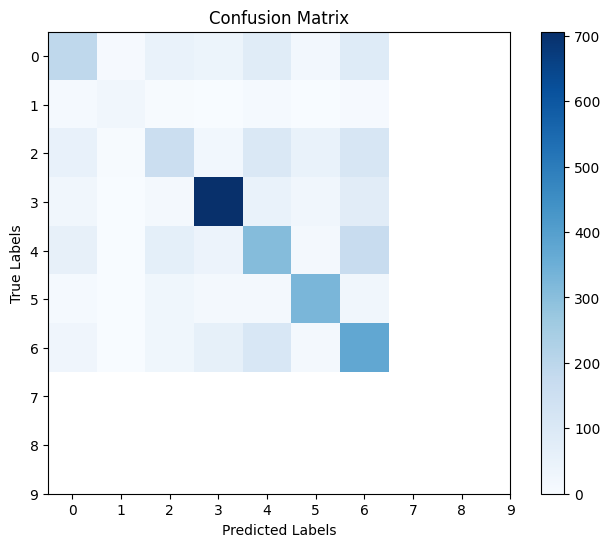

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# get predicted labels and true labels
predicted_labels = model.predict(X_test)
true_labels = np.argmax(test_y, axis=1)

# generate confusion matrix
conf_matrix = confusion_matrix(true_labels, np.argmax(predicted_labels, axis=1))

# print classification report
class_report = classification_report(true_labels, np.argmax(predicted_labels, axis=1))
print("Classification Report:\n", class_report)

# plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
